# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 29.11.2023

Мягий дедлайн: 23:59 12.12.2023

Жестокий дедлайн: 23:59 14.12.2023

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/56884/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 11

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

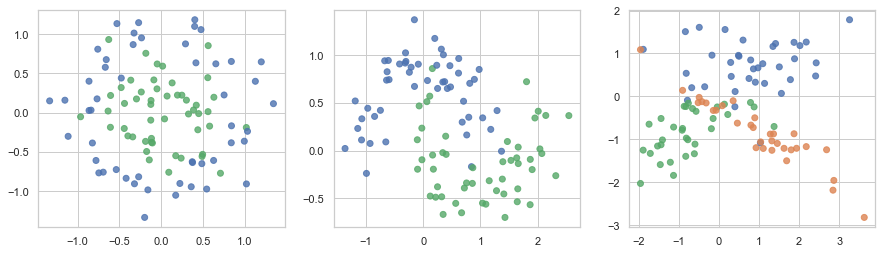

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [7]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

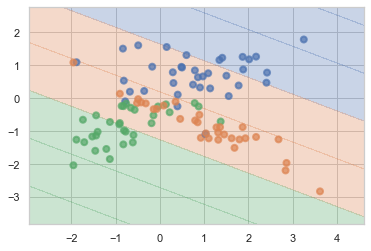

In [8]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [12]:
df1 = datasets[0]
df2 = datasets[1]
df3 = datasets[2]

X1 = df1[0]
y1 = df1[1]

X2 = df2[0]
y2 = df2[1]

X3 = df3[0]
y3 = df3[1]

from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=42)

accuracy для обучающей выборки на 1 датасете: 1.0
accuracy для тестовой выборки на 1 датасете: 0.7666666666666667


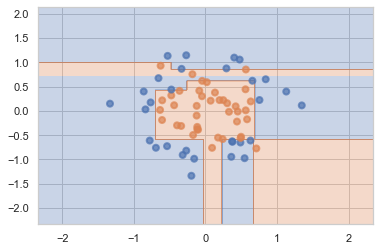

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
np.random.seed(123)

tree1 = DecisionTreeClassifier(random_state=123).fit(X_train1, y_train1)
pred_train1 = tree1.predict(X_train1)
pred1 = tree1.predict(X_test1)
acc_train1 = accuracy_score(y_train1, pred_train1)
acc1 = accuracy_score(y_test1, pred1)
print(f"accuracy для обучающей выборки на 1 датасете: {acc_train1}")
print(f"accuracy для тестовой выборки на 1 датасете: {acc1}")
plot_surface(tree1, X_train1, y_train1)

accuracy для обучающей выборки на 2 датасете: 1.0
accuracy для тестовой выборки на 2 датасете: 0.8666666666666667


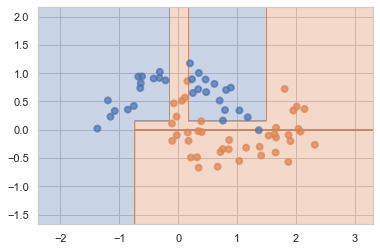

In [36]:
np.random.seed(123)

tree1 = DecisionTreeClassifier(random_state=123).fit(X_train2, y_train2)
pred_train2 = tree2.predict(X_train2)
pred2 = tree2.predict(X_test2)
acc_train2 = accuracy_score(y_train2, pred_train2)
acc2 = accuracy_score(y_test2, pred2)
print(f"accuracy для обучающей выборки на 2 датасете: {acc_train2}")
print(f"accuracy для тестовой выборки на 2 датасете: {acc2}")
plot_surface(tree2, X_train2, y_train2)

accuracy для обучающей выборки на 3 датасете: 1.0
accuracy для тестовой выборки на 3 датасете: 0.7666666666666667


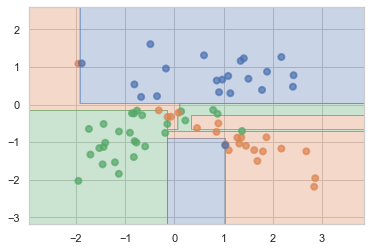

In [37]:
np.random.seed(123)

tree3 = DecisionTreeClassifier(random_state=123).fit(X_train3, y_train3)
pred_train3 = tree3.predict(X_train3)
pred3 = tree3.predict(X_test3)
acc_train3 = accuracy_score(y_train3, pred_train3)
acc3 = accuracy_score(y_test3, pred3)
print(f"accuracy для обучающей выборки на 3 датасете: {acc_train3}")
print(f"accuracy для тестовой выборки на 3 датасете: {acc3}")
plot_surface(tree3, X_train3, y_train3)

__Ответ:__ Сильно переобучаются. Во многих местах видно, что пытаются захватить 1 единственный объект, проводя разделяющую линию. Другими словами, во многих местах они очень сильно подстраиваются под выборку. Это также видно, по результатам accuracy для обучающей выборки, который для все датасетов равен 1. 

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

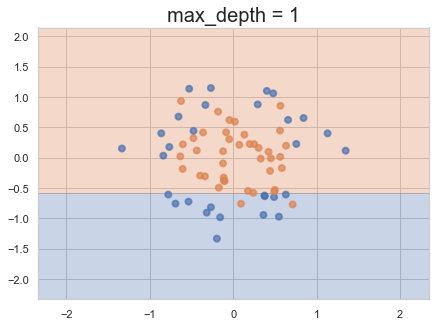

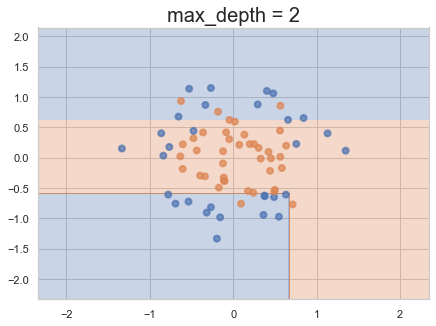

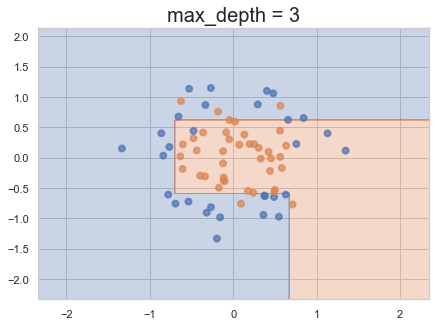

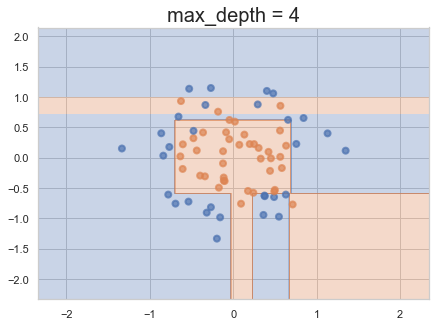

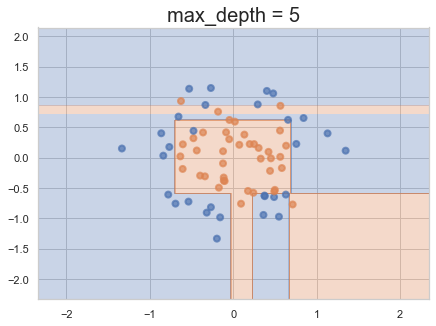

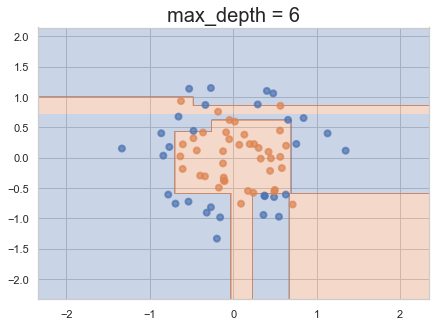

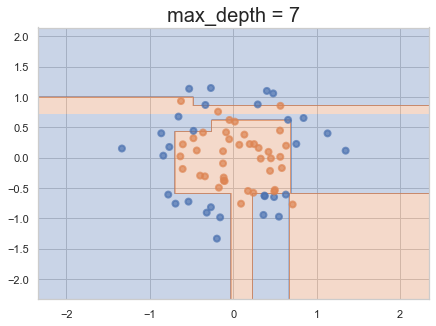

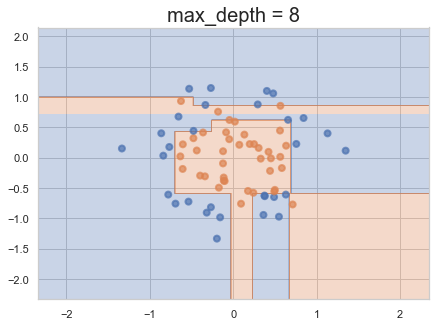

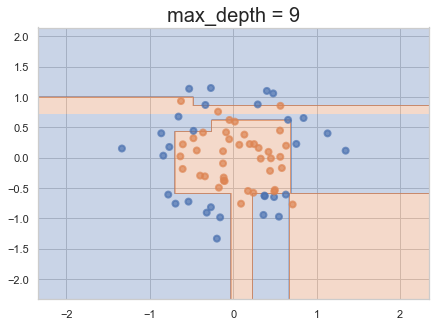

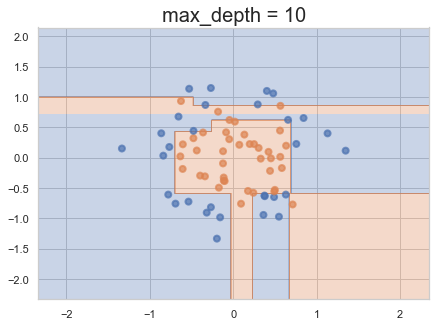

In [66]:
max_depths = np.arange(1, 11, 1)
min_samples_leafs = np.arange(1, 6, 1)
np.random.seed(123)
results1 = {'max_depth':[], 'acc_train':[], 'acc_test':[]}

for max_depth in max_depths:
    tree1 = DecisionTreeClassifier(random_state=123, max_depth=max_depth).fit(X_train1, y_train1)
    pred_train1 = tree1.predict(X_train1)
    pred1 = tree1.predict(X_test1)
    acc_train1 = accuracy_score(y_train1, pred_train1)
    acc1 = accuracy_score(y_test1, pred1)
    results1['max_depth'].append(max_depth)
    results1['acc_train'].append(acc_train1)
    results1['acc_test'].append(acc1)
    plt.figure(figsize=(7, 5))
    plot_surface(tree1, X_train1, y_train1)
    plt.title(f'max_depth = {max_depth}', fontsize=20)

In [67]:
results1 = pd.DataFrame(results1)
results1

,max_depth,acc_train,acc_test
0,1,0.728571,0.466667
1,2,0.828571,0.633333
2,3,0.885714,0.733333
3,4,0.957143,0.700000
4,5,0.971429,0.733333
5,6,1.000000,0.766667
6,7,1.000000,0.766667
7,8,1.000000,0.766667
8,9,1.000000,0.766667
9,10,1.000000,0.766667


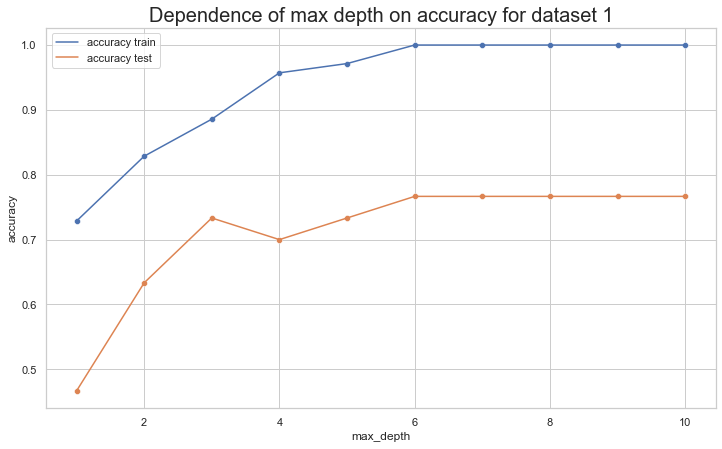

In [69]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=results1, x='max_depth', y='acc_train')
sns.scatterplot(data=results1, x='max_depth', y='acc_train')
sns.lineplot(data=results1, x='max_depth', y='acc_test')
sns.scatterplot(data=results1, x='max_depth', y='acc_test')
plt.legend(['accuracy train', 'accuracy test'])
plt.ylabel('accuracy')
plt.title('Dependence of max depth on accuracy for dataset 1', fontsize=20);

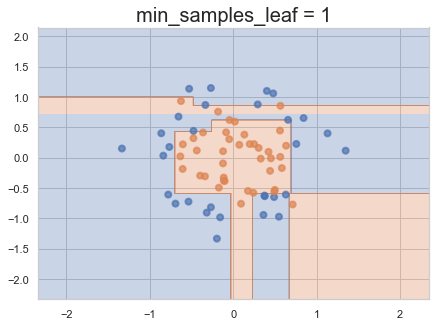

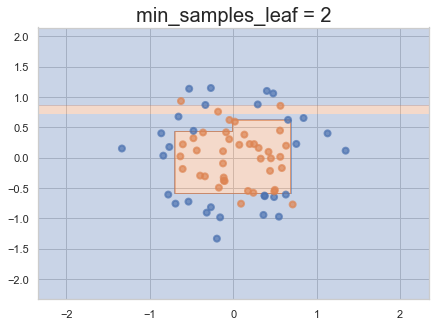

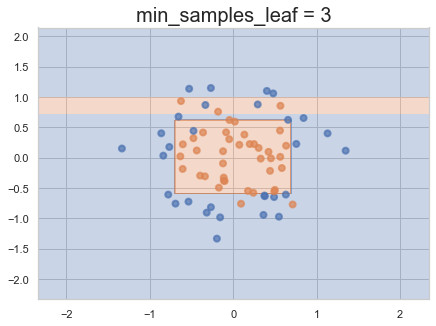

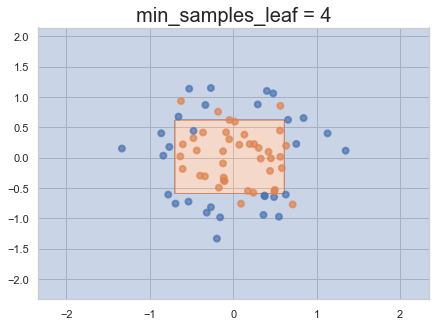

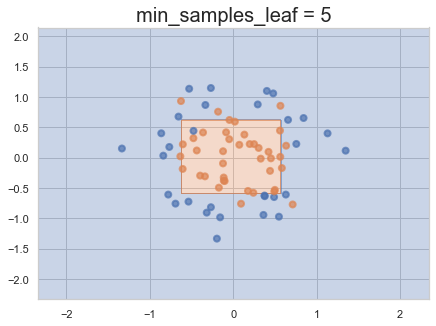

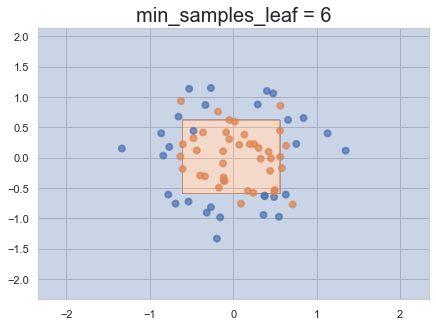

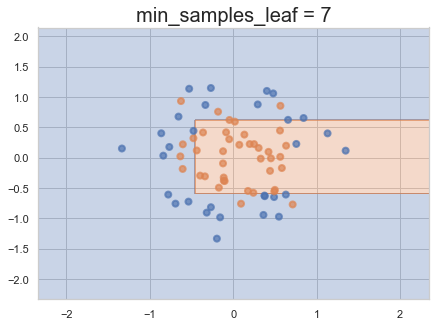

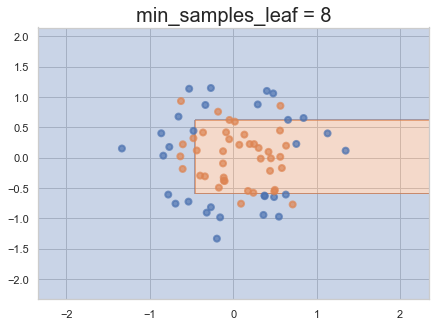

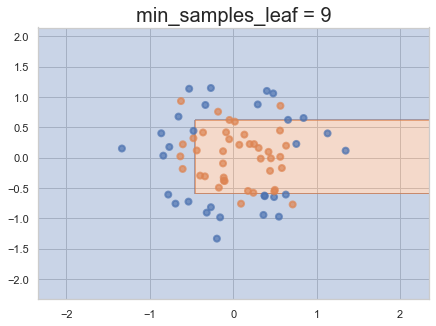

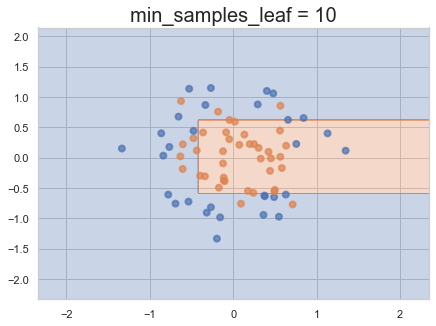

In [91]:
results1 = {'min_samples_leaf':[], 'acc_train':[], 'acc_test':[]}
min_samples_leafs = np.arange(1, 11, 1)

for min_samples_leaf in min_samples_leafs:
    tree1 = DecisionTreeClassifier(random_state=123, min_samples_leaf=min_samples_leaf).fit(X_train1, y_train1)
    pred_train1 = tree1.predict(X_train1)
    pred1 = tree1.predict(X_test1)
    acc_train1 = accuracy_score(y_train1, pred_train1)
    acc1 = accuracy_score(y_test1, pred1)
    results1['min_samples_leaf'].append(min_samples_leaf)
    results1['acc_train'].append(acc_train1)
    results1['acc_test'].append(acc1)
    plt.figure(figsize=(7, 5))
    plot_surface(tree1, X_train1, y_train1)
    plt.title(f'min_samples_leaf = {min_samples_leaf}', fontsize=20)

In [92]:
results1 = pd.DataFrame(results1)
results1

,min_samples_leaf,acc_train,acc_test
0,1,1.000000,0.766667
1,2,0.942857,0.866667
2,3,0.928571,0.800000
3,4,0.900000,0.866667
4,5,0.871429,0.900000
5,6,0.842857,0.900000
6,7,0.828571,0.800000
7,8,0.828571,0.800000
8,9,0.828571,0.800000
9,10,0.814286,0.766667


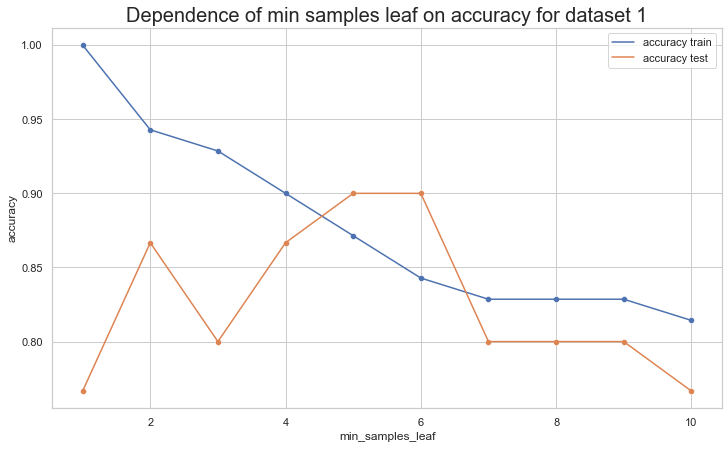

In [93]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=results1, x='min_samples_leaf', y='acc_train')
sns.scatterplot(data=results1, x='min_samples_leaf', y='acc_train')
sns.lineplot(data=results1, x='min_samples_leaf', y='acc_test')
sns.scatterplot(data=results1, x='min_samples_leaf', y='acc_test')
plt.legend(['accuracy train', 'accuracy test'])
plt.ylabel('accuracy')
plt.title('Dependence of min samples leaf on accuracy for dataset 1', fontsize=20);

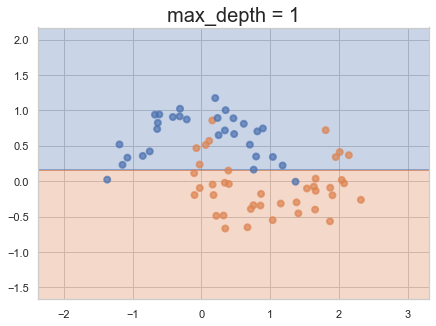

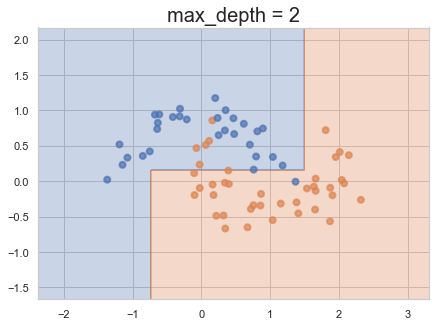

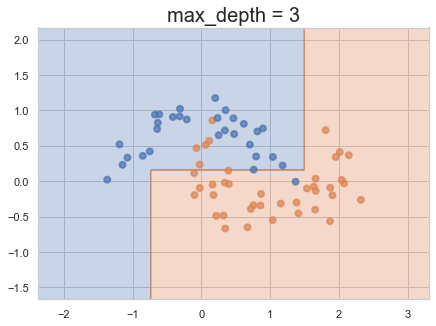

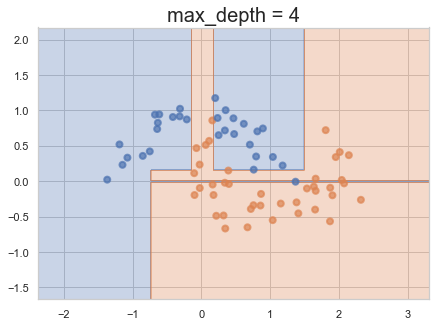

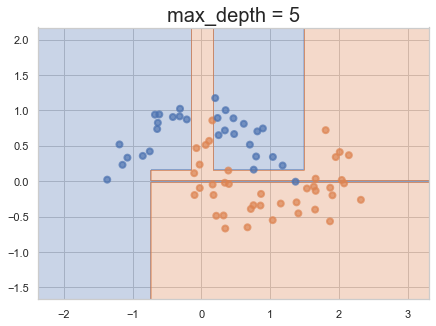

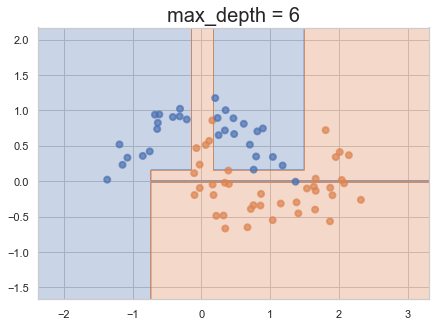

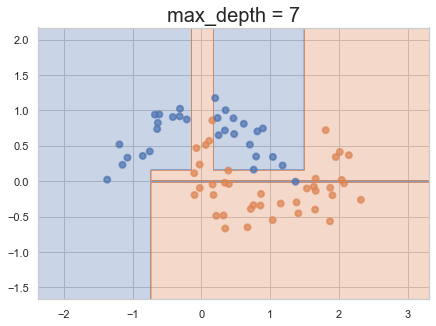

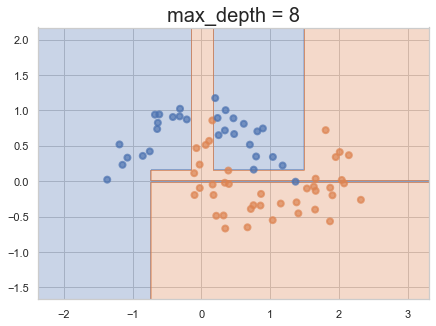

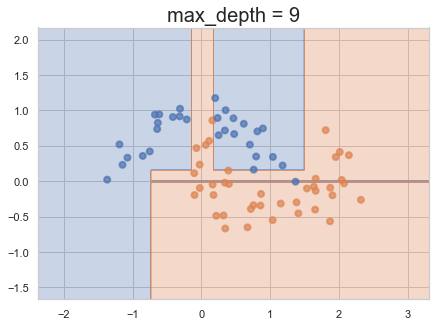

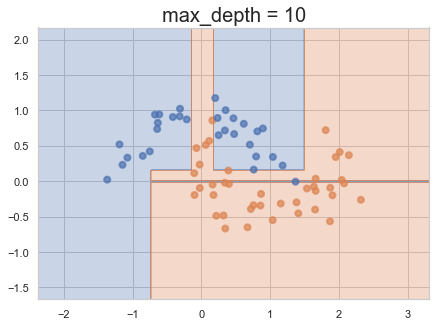

In [73]:
np.random.seed(123)
results2 = {'max_depth':[], 'acc_train':[], 'acc_test':[]}

for max_depth in max_depths:
    tree2 = DecisionTreeClassifier(random_state=123, max_depth=max_depth).fit(X_train2, y_train2)
    pred_train2 = tree2.predict(X_train2)
    pred2 = tree2.predict(X_test2)
    acc_train2 = accuracy_score(y_train2, pred_train2)
    acc2 = accuracy_score(y_test2, pred2)
    results2['max_depth'].append(max_depth)
    results2['acc_train'].append(acc_train2)
    results2['acc_test'].append(acc2)
    plt.figure(figsize=(7, 5))
    plot_surface(tree2, X_train2, y_train2)
    plt.title(f'max_depth = {max_depth}', fontsize=20)

In [74]:
results2 = pd.DataFrame(results2)
results2

,max_depth,acc_train,acc_test
0,1,0.842857,0.800000
1,2,0.914286,0.933333
2,3,0.914286,0.933333
3,4,1.000000,0.866667
4,5,1.000000,0.866667
5,6,1.000000,0.866667
6,7,1.000000,0.866667
7,8,1.000000,0.866667
8,9,1.000000,0.866667
9,10,1.000000,0.866667


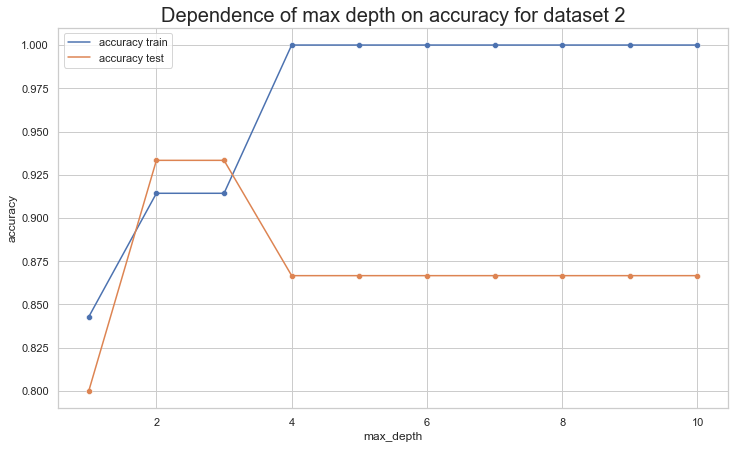

In [76]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=results2, x='max_depth', y='acc_train')
sns.scatterplot(data=results2, x='max_depth', y='acc_train')
sns.lineplot(data=results2, x='max_depth', y='acc_test')
sns.scatterplot(data=results2, x='max_depth', y='acc_test')
plt.legend(['accuracy train', 'accuracy test'])
plt.ylabel('accuracy')
plt.title('Dependence of max depth on accuracy for dataset 2', fontsize=20);

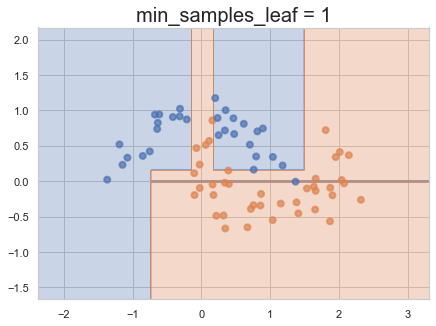

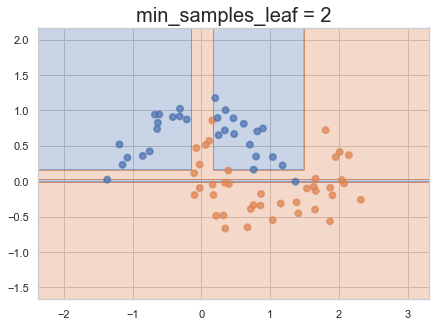

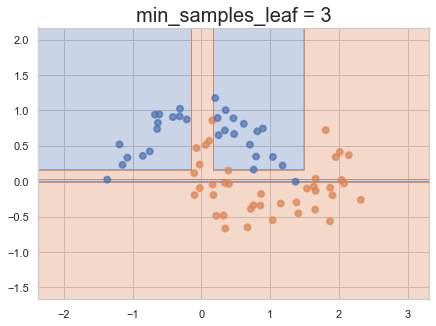

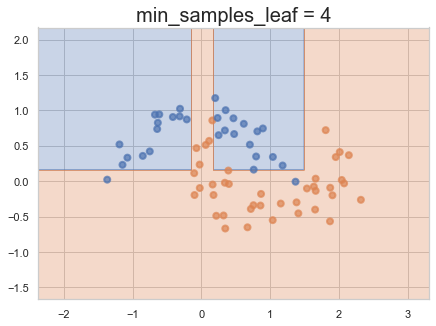

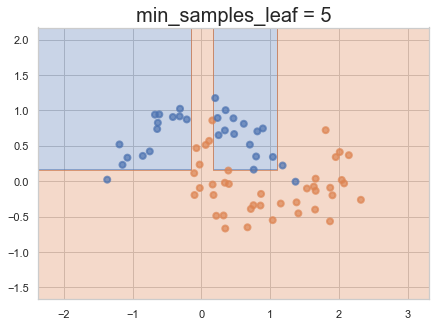

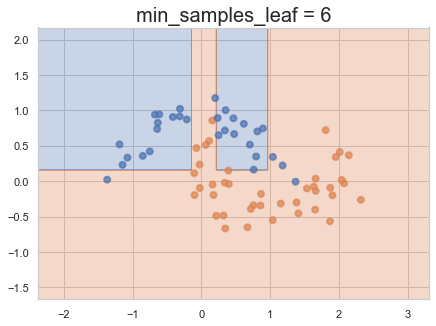

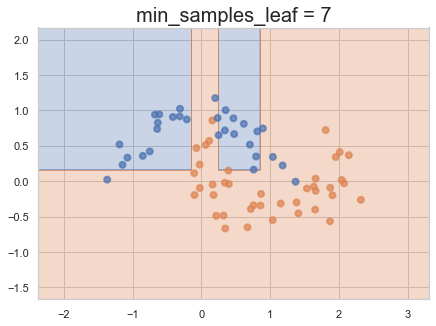

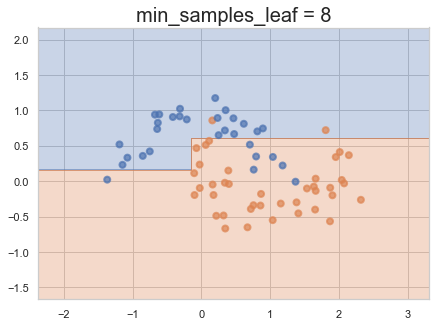

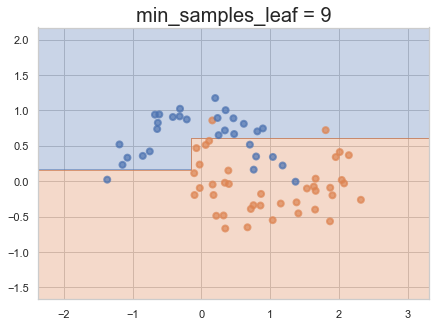

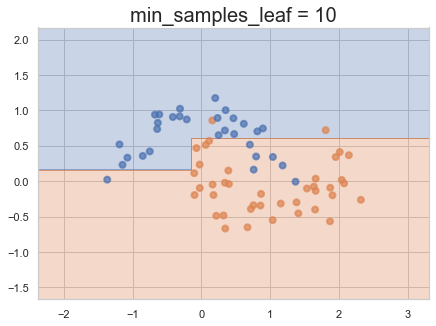

In [80]:
min_samples_leafs = np.arange(1, 11, 1)
results2 = {'min_samples_leaf':[], 'acc_train':[], 'acc_test':[]}

for min_samples_leaf in min_samples_leafs:
    tree2 = DecisionTreeClassifier(random_state=123, min_samples_leaf=min_samples_leaf).fit(X_train2, y_train2)
    pred_train2 = tree2.predict(X_train2)
    pred2 = tree2.predict(X_test2)
    acc_train2 = accuracy_score(y_train2, pred_train2)
    acc2 = accuracy_score(y_test2, pred2)
    results2['min_samples_leaf'].append(min_samples_leaf)
    results2['acc_train'].append(acc_train2)
    results2['acc_test'].append(acc2)
    plt.figure(figsize=(7, 5))
    plot_surface(tree2, X_train2, y_train2)
    plt.title(f'min_samples_leaf = {min_samples_leaf}', fontsize=20)

In [81]:
results2 = pd.DataFrame(results2)
results2

,min_samples_leaf,acc_train,acc_test
0,1,1.000000,0.866667
1,2,0.985714,0.766667
2,3,0.985714,0.766667
3,4,0.971429,0.766667
4,5,0.957143,0.733333
5,6,0.928571,0.700000
6,7,0.900000,0.700000
7,8,0.871429,0.766667
8,9,0.871429,0.766667
9,10,0.871429,0.766667


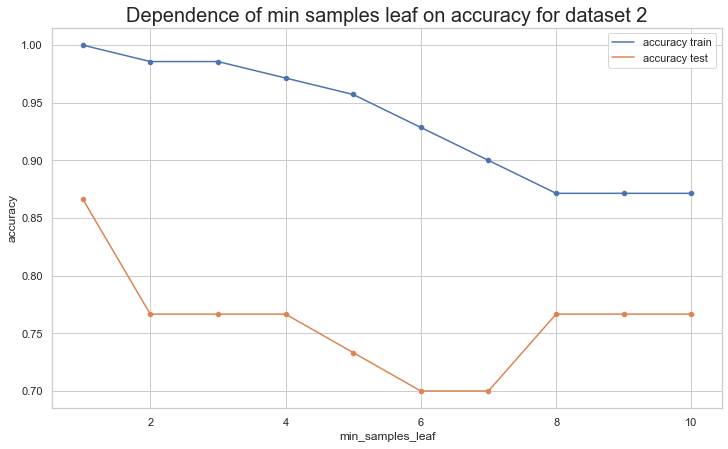

In [83]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=results2, x='min_samples_leaf', y='acc_train')
sns.scatterplot(data=results2, x='min_samples_leaf', y='acc_train')
sns.lineplot(data=results2, x='min_samples_leaf', y='acc_test')
sns.scatterplot(data=results2, x='min_samples_leaf', y='acc_test')
plt.legend(['accuracy train', 'accuracy test'])
plt.ylabel('accuracy')
plt.title('Dependence of min samples leaf on accuracy for dataset 2', fontsize=20);

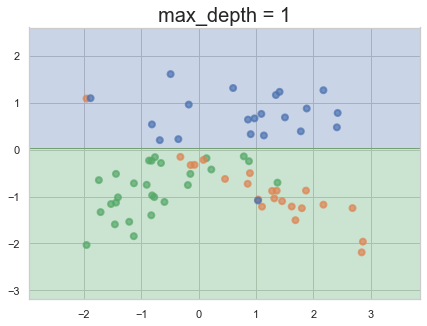

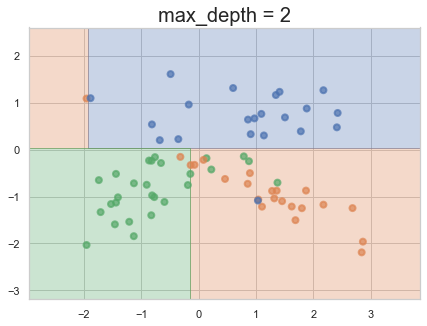

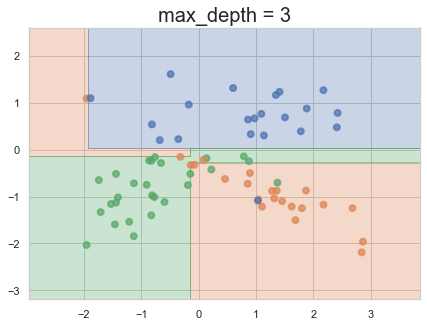

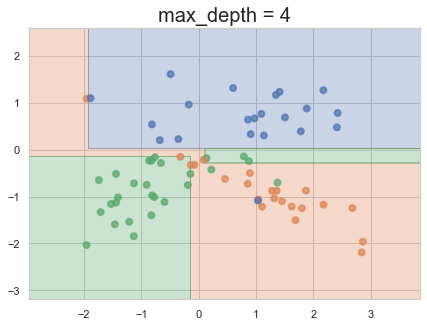

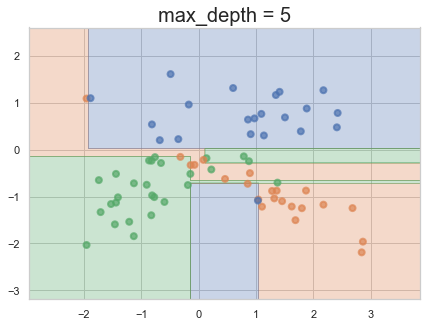

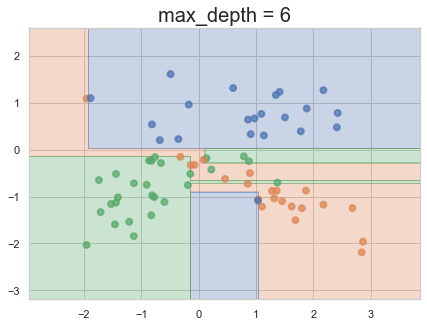

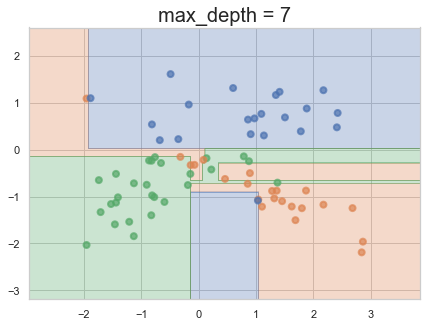

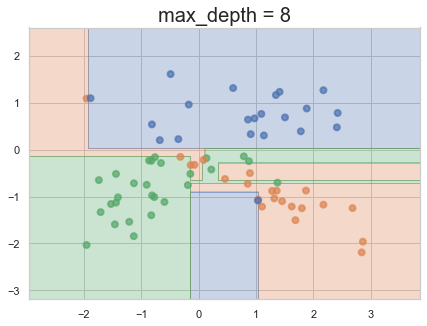

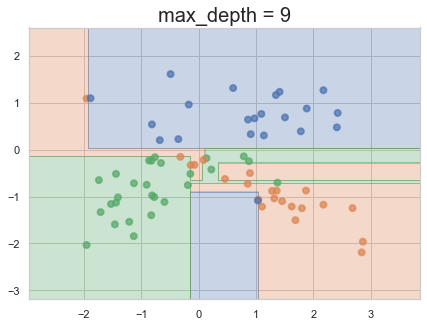

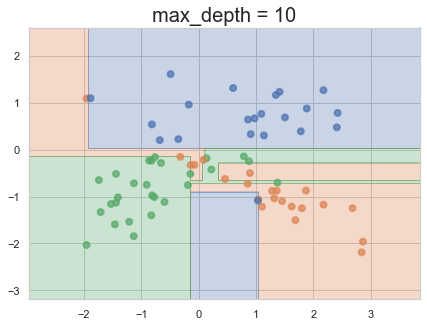

In [84]:
np.random.seed(123)
results3 = {'max_depth':[], 'acc_train':[], 'acc_test':[]}

for max_depth in max_depths:
    tree3 = DecisionTreeClassifier(random_state=123, max_depth=max_depth).fit(X_train3, y_train3)
    pred_train3 = tree3.predict(X_train3)
    pred3 = tree3.predict(X_test3)
    acc_train3 = accuracy_score(y_train3, pred_train3)
    acc3 = accuracy_score(y_test3, pred3)
    results3['max_depth'].append(max_depth)
    results3['acc_train'].append(acc_train3)
    results3['acc_test'].append(acc3)
    plt.figure(figsize=(7, 5))
    plot_surface(tree3, X_train3, y_train3)
    plt.title(f'max_depth = {max_depth}', fontsize=20)

In [85]:
results3 = pd.DataFrame(results3)
results3

,max_depth,acc_train,acc_test
0,1,0.671429,0.600000
1,2,0.900000,0.766667
2,3,0.942857,0.866667
3,4,0.957143,0.833333
4,5,0.971429,0.766667
5,6,0.985714,0.766667
6,7,1.000000,0.766667
7,8,1.000000,0.766667
8,9,1.000000,0.766667
9,10,1.000000,0.766667


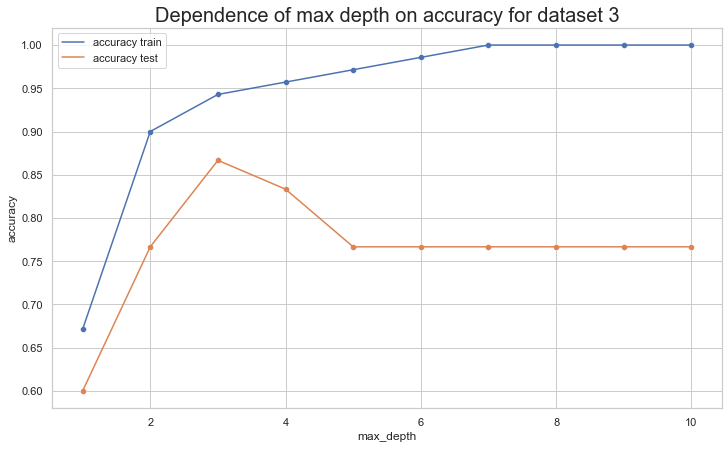

In [86]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=results3, x='max_depth', y='acc_train')
sns.scatterplot(data=results3, x='max_depth', y='acc_train')
sns.lineplot(data=results3, x='max_depth', y='acc_test')
sns.scatterplot(data=results3, x='max_depth', y='acc_test')
plt.legend(['accuracy train', 'accuracy test'])
plt.ylabel('accuracy')
plt.title('Dependence of max depth on accuracy for dataset 3', fontsize=20);

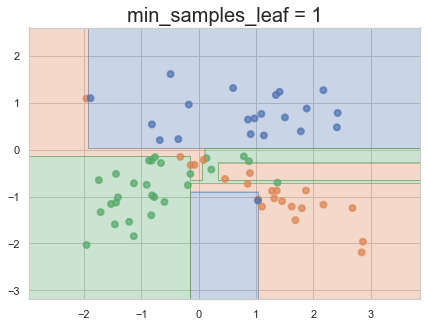

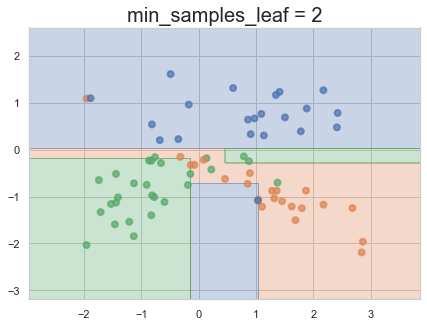

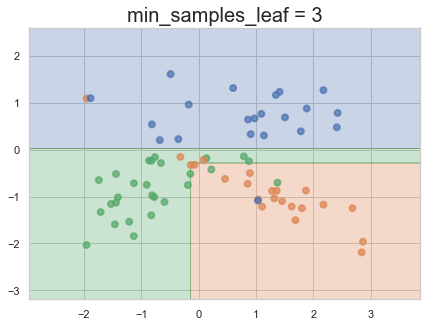

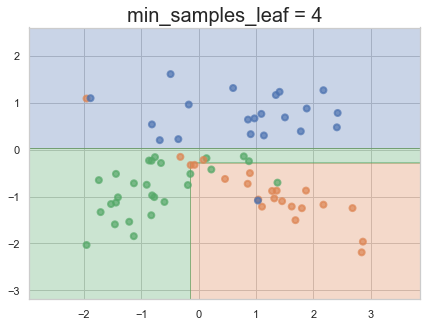

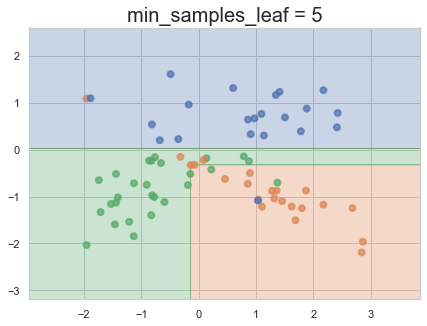

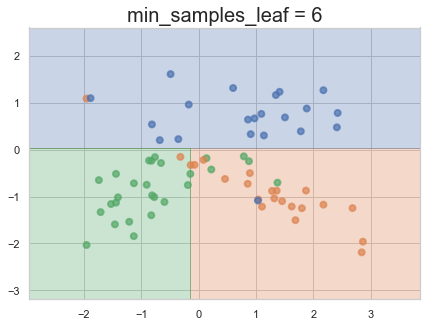

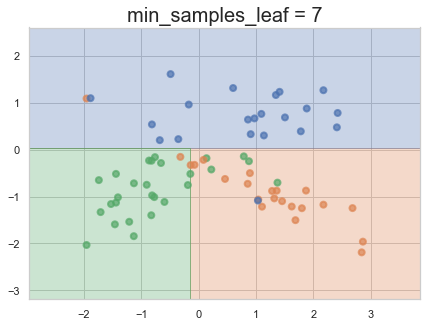

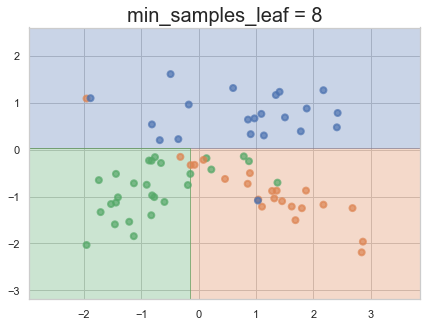

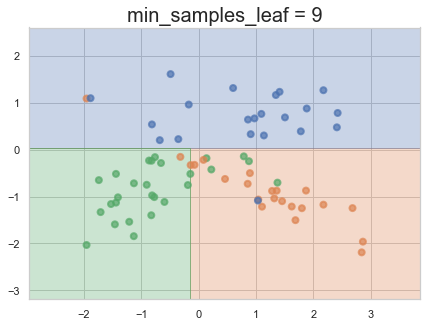

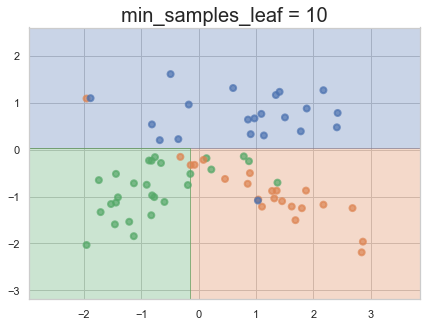

In [87]:
min_samples_leafs = np.arange(1, 11, 1)
results3 = {'min_samples_leaf':[], 'acc_train':[], 'acc_test':[]}

for min_samples_leaf in min_samples_leafs:
    tree3 = DecisionTreeClassifier(random_state=123, min_samples_leaf=min_samples_leaf).fit(X_train3, y_train3)
    pred_train3 = tree3.predict(X_train3)
    pred3 = tree3.predict(X_test3)
    acc_train3 = accuracy_score(y_train3, pred_train3)
    acc3 = accuracy_score(y_test3, pred3)
    results3['min_samples_leaf'].append(min_samples_leaf)
    results3['acc_train'].append(acc_train3)
    results3['acc_test'].append(acc3)
    plt.figure(figsize=(7, 5))
    plot_surface(tree3, X_train3, y_train3)
    plt.title(f'min_samples_leaf = {min_samples_leaf}', fontsize=20)

In [88]:
results3 = pd.DataFrame(results3)
results3

,min_samples_leaf,acc_train,acc_test
0,1,1.000000,0.766667
1,2,0.914286,0.833333
2,3,0.914286,0.766667
3,4,0.914286,0.766667
4,5,0.900000,0.766667
5,6,0.885714,0.766667
6,7,0.885714,0.766667
7,8,0.885714,0.766667
8,9,0.885714,0.766667
9,10,0.885714,0.766667


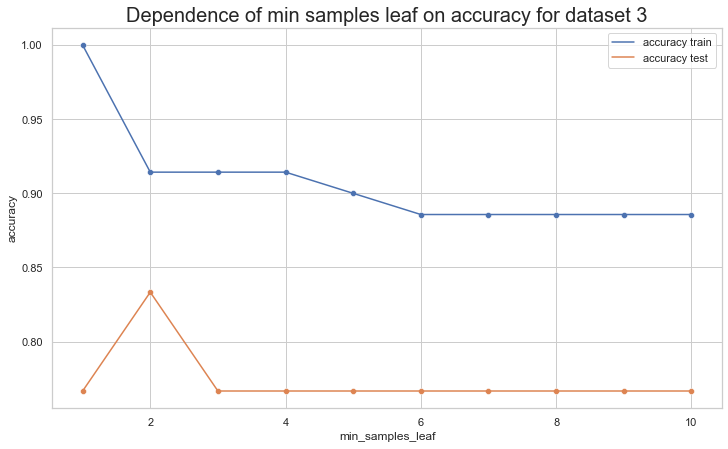

In [90]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=results3, x='min_samples_leaf', y='acc_train')
sns.scatterplot(data=results3, x='min_samples_leaf', y='acc_train')
sns.lineplot(data=results3, x='min_samples_leaf', y='acc_test')
sns.scatterplot(data=results3, x='min_samples_leaf', y='acc_test')
plt.legend(['accuracy train', 'accuracy test'])
plt.ylabel('accuracy')
plt.title('Dependence of min samples leaf on accuracy for dataset 3', fontsize=20);

__Ответ:__

* max_depth: Здесь деревья на всех выборках ведут себя примерно одинаково. Когда max_depth маленький они не могут сильно переобучиться из-за ограничения количества разбиений. Следовательно, в начале их accuracy на трейне и тесте относительно малы. При увеличении max_depth accuracy на обоих выборках растет. В какой-то момент accuracy достигает 1 и выходит на плато, то есть больше не меняется. Для 1-ой выборки это max_depth = 6, для второй - 4, для третьей - 7. Таким образом, меньше всего разбиений для получения идеального accuracy требуется второй модели, обучающейся на выборке номер 2. Интересно, что для этой же модели, accuracy на тесте выше трейна, когда max_depth равен 2 или 3, то есть когда мы не даем модели переобучаться. 

* min_samples_leaf: min_samples_leaf в отличии от max_depth работает в обратную сторону. Чем меньше min_samples_leaf, тем выше accuracy модели и тем больше она переобучается. Когда же min_samples_leaf большой, модели приходиться делать более "крупные" разбиения, то есть такие, чтобы в новую область попадало не меньше min_samples_leaf. На всех датасетах качество на трейне при увеличении min_samples_leaf падает, что свидетельствует о меньшей подстройке под данные. Accuracy на тесте может как падать, так и расти. Для первого датасета качество на тесте при некоторых значениях min_samples_leaf (при 5 и 6) даже выше, чем на трейне. Справедливо также, что в какой-то момент качество может перестать меняться, потому что мы достигли более-менее оптимальной разбивки, при которой большое количество наблюдений попадают в разбиваемые области. Это можно наблюдать на примере второго и третьего датасетов. Вторая модель выходит на плато при min_samples_leaf = 8, а третья - при 6 (для трейна и теста). 

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

In [588]:
# векторизованный:

import numpy as np
from collections import Counter


def find_best_split(feature_vector, target_vector):
    """
    Под критерием Джини здесь подразумевается следующая функция:
    $$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

    Указания:
    * Пороги, приводящие к попаданию в одно из поддеревьев пустого множества объектов, не рассматриваются.
    * В качестве порогов, нужно брать среднее двух сосдених (при сортировке) значений признака
    * Поведение функции в случае константного признака может быть любым.
    * При одинаковых приростах Джини нужно выбирать минимальный сплит.
    * За наличие в функции циклов балл будет снижен. Векторизуйте! :)

    :param feature_vector: вещественнозначный вектор значений признака
    :param target_vector: вектор классов объектов,  len(feature_vector) == len(target_vector)

    :return thresholds: отсортированный по возрастанию вектор со всеми возможными порогами, по которым объекты можно
     разделить на две различные подвыборки, или поддерева
    :return ginis: вектор со значениями критерия Джини для каждого из порогов в thresholds len(ginis) == len(thresholds)
    :return threshold_best: оптимальный порог (число)
    :return gini_best: оптимальное значение критерия Джини (число)
    """
    # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    
    unique, ntimes = np.unique(np.sort(feature_vector), return_counts=True)
    _, inverse = np.unique(feature_vector, return_inverse=True)
    target_new = np.bincount(inverse, weights=target_vector)

    
    thresholds = (unique[:-1] + unique[1:])/2
    Rm = np.sum(ntimes)
    Rl = np.cumsum(ntimes)[:-1]
    Rr = np.sum(ntimes) - Rl
    p1_left = np.cumsum(target_new)[:-1] / Rl
    p0_left = 1 - p1_left
    p1_right = (np.sum(target_new) - np.cumsum(target_new)[:-1]) / Rr
    p0_right = 1 - p1_right
    H_l = 1 - p1_left**2 - p0_left**2
    H_r = 1 - p1_right**2 - p0_right**2
    ginis = - Rl/Rm*H_l - Rr/Rm*H_r
    
    gini_best = np.max(ginis)
    threshold_best = thresholds[np.argmax(ginis)]
    
    return thresholds, ginis, threshold_best, gini_best

ссылка на удачную посылку: https://contest.yandex.ru/contest/56884/run-report/102569204/

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [589]:
df = pd.read_csv("students.csv")
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


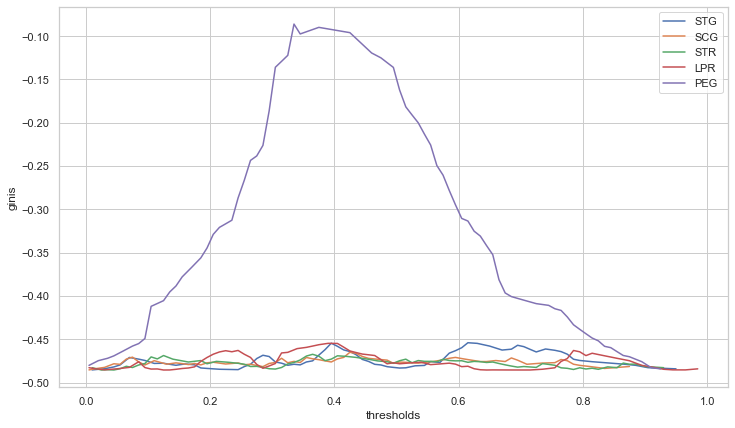

In [590]:
results = {}
features = df.columns[:-1]
target = df.columns[-1]
plt.figure(figsize=(12, 7))

for feature in features:
    thresholds, ginis, threshold_best, gini_best = find_best_split(df[feature], df[target])
    results[feature] = [thresholds, ginis, threshold_best, gini_best]
    sns.lineplot(thresholds, ginis)
    
plt.legend(features)
plt.xlabel('thresholds')
plt.ylabel('ginis');

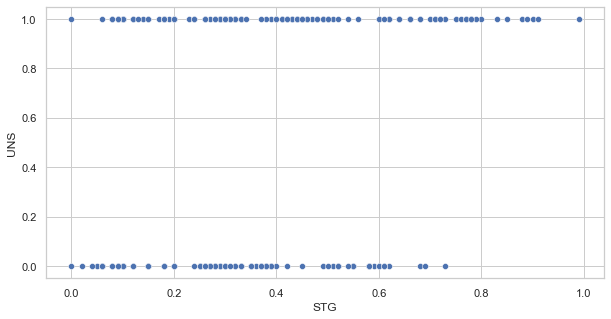

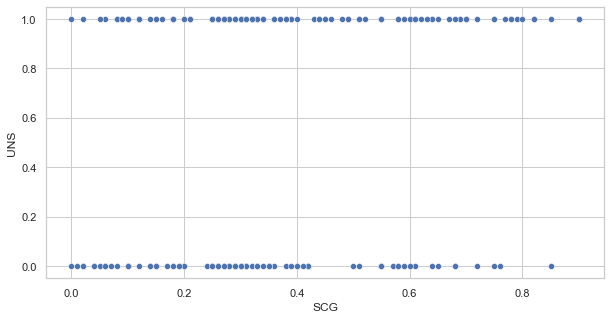

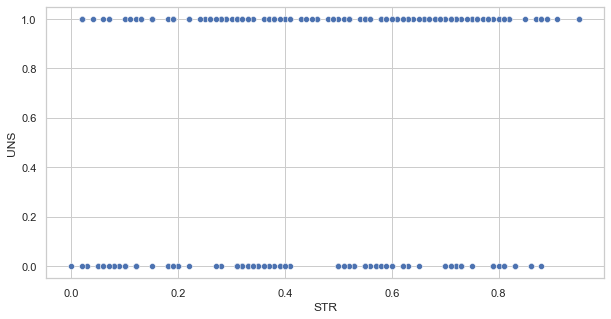

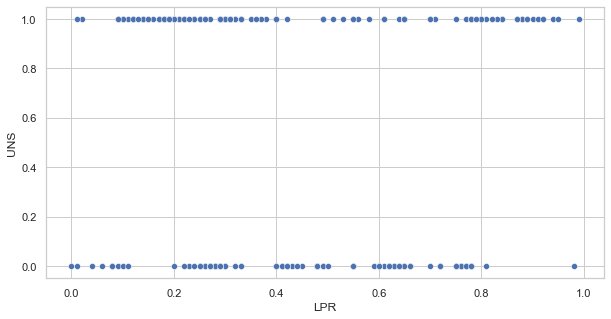

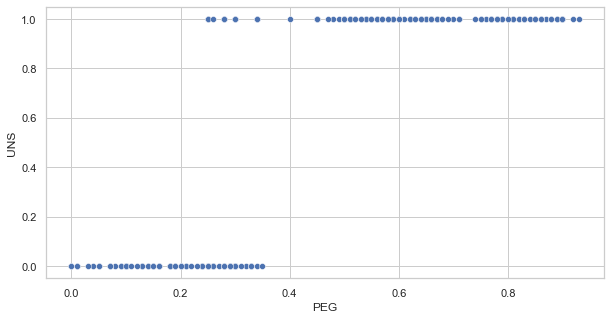

In [591]:
for feature in features:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(df[feature], df[target])

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** Лучше всего делать разбиение по признаку PEG. Это полностью согласует с точечными диагрммами. На точеченой диаграмме для PEG видно, что можно практически идеально разделить выборку при пороге около 0.4. График с джини говорит о том же самом, так как в окрестностях 0.4 PEG достигает максимального значения критерия информативности близкого к 0. Вид кривой для хороших признаков должен выглядеть примерно как для PEG, то есть как парабола с ветвями вниз. Интерпретация такой кривой следующая: сначала при увеличении порога критерий информативности увеличивается, потом в какой-то момент мы достигаем лучшего порога, при котором выборка делиться почти идеально и критерий информативности максимален, последующее увеличение порога будет ухудщать качество. Кривые для признаков, по которым деление почти невозможно похожи на кривые для всех остальных признаков помимо PEG. Вне зависимоти от порога критерий информативности остается на одном уровне. Это значит, что выборку нельзя разбить так, чтобы наблюдалось значимое улучшение. 

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

In [593]:
class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf

    def _fit_node(self, sub_X, sub_y, node):
        
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            if len(np.unique(sub_X[:, feature])) == 1:
                node["type"] = "terminal"
                node["class"] = sub_y[0]
                continue
                
            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0

                    ratio[key] = current_click / current_count

                ratio_sorted = dict(sorted(ratio.items(), key=lambda x:x[1]))
                categories_map = dict(zip(ratio_sorted.keys(), np.arange(len(ratio_sorted))))

                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature])))
            else:
                raise ValueError


            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini

                if feature_type == "real":
                    threshold_best = threshold
                    split = feature_vector < threshold
                elif feature_type == "categorical":
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, ratio.items())))

                    split = feature_vector < threshold
                else:
                    raise ValueError
                

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return

        node["type"] = "nonterminal"

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":

            node["categories_split"] = threshold_best
        else:
            raise ValueError
            
            
        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"])
        

    def _predict_node(self, x, node):
        # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        if node['type'] == 'nonterminal':
            if 'threshold' in node.keys():
                split = x[node['feature_split']] < node['threshold']
                if split == True:
                    return self._predict_node(x, node['left_child'])
                
                else:
                    return self._predict_node(x, node['right_child'])
            else:
                if x[node['feature_split']] in node['categories_split']:
                    return self._predict_node(x, node['left_child'])
                else:
                    return self._predict_node(x, node['right_child'])

        else:
            return node['class']

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

успешная посылка: https://contest.yandex.ru/contest/56884/run-report/102672461/

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [594]:
from sklearn.preprocessing import LabelEncoder

m_df = pd.read_csv('agaricus-lepiota.data')
le = LabelEncoder()
for column in m_df.columns:
    m_df[column] = le.fit_transform(m_df[column])

In [595]:
m_df

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8119,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8120,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8121,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [596]:
from sklearn.model_selection import train_test_split
y = m_df['p']
X = m_df.drop(columns='p')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [597]:
tree = DecisionTree2(feature_types=['categorical'] * X_train.shape[1])
tree.fit(X_train.to_numpy(), y_train.to_numpy())

In [598]:
tree._tree

{'type': 'nonterminal',
 'class': 0,
 'feature_split': 4,
 'categories_split': [0, 3, 5],
 'left_child': {'type': 'nonterminal',
  'class': 0,
  'feature_split': 19,
  'categories_split': [2, 3, 4, 1, 0, 8, 6, 7],
  'left_child': {'type': 'nonterminal',
   'class': 0,
   'feature_split': 14,
   'categories_split': [6, 5, 2, 3, 7, 4],
   'left_child': {'type': 'nonterminal',
    'class': 0,
    'feature_split': 1,
    'categories_split': [2, 0, 3],
    'left_child': {'type': 'nonterminal',
     'class': 0,
     'feature_split': 0,
     'categories_split': [4, 5, 2, 0, 3],
     'left_child': {'type': 'nonterminal',
      'class': 0,
      'feature_split': 14,
      'categories_split': [6, 5, 2, 3, 7],
      'left_child': {'type': 'nonterminal',
       'class': 0,
       'feature_split': 21,
       'categories_split': [6, 0, 3, 1, 4, 5],
       'left_child': {'type': 'terminal', 'class': 0},
       'right_child': {'type': 'nonterminal',
        'class': 0,
        'feature_split': 1,
    

In [599]:
pred = tree.predict(X_test.to_numpy())

In [600]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

1.0

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

In [601]:
class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf
        self._depth = 0

    def _fit_node(self, sub_X, sub_y, node):
        
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return
        if self._max_depth != None:
            if self._depth == self._max_depth: # критерий останова на max_depth
                node["type"] = "terminal"
                node["class"] = Counter(sub_y).most_common(1)[0][0]
                return
        if self._min_samples_split != None:
            if len(sub_y) < self._min_samples_split: # критерий останова на min_samples_split
                node["type"] = "terminal"
                node["class"] = Counter(sub_y).most_common(1)[0][0]
                return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            if len(np.unique(sub_X[:, feature])) == 1:
                node["type"] = "terminal"
                node["class"] = sub_y[0]
                continue

            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0

                    ratio[key] = current_click / current_count

                ratio_sorted = dict(sorted(ratio.items(), key=lambda x:x[1]))
                categories_map = dict(zip(ratio_sorted.keys(), np.arange(len(ratio_sorted))))

                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature])))

            else:
                raise ValueError



            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini

                if feature_type == "real":
                    threshold_best = threshold
                    split = feature_vector < threshold
                elif feature_type == "categorical":
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))

                    split = feature_vector < threshold
                else:
                    raise ValueError
                

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return
        # критерий останова на min_samples_leaf
        if self._min_samples_leaf != None:
            if (len(sub_y[split]) < self._min_samples_leaf) or (len(sub_y[np.logical_not(split)]) < self._min_samples_leaf):
                node["type"] = "terminal"
                node["class"] = Counter(sub_y).most_common(1)[0][0]
                return

        node["type"] = "nonterminal"
        self._depth += 1

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
            

        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"])
        

    def _predict_node(self, x, node):
        # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        if node['type'] == 'nonterminal':
            if 'threshold' in node.keys():
                split = x[node['feature_split']] < node['threshold']
                if split == True:
                    return self._predict_node(x, node['left_child'])
                
                else:
                    return self._predict_node(x, node['right_child'])
            else:
                if x[node['feature_split']] in node['categories_split']:
                    return self._predict_node(x, node['left_child'])
                else:
                    return self._predict_node(x, node['right_child'])

        else:
            return node['class']

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

успешная посылка: https://contest.yandex.ru/contest/56884/run-report/102672461/

In [602]:
ttt_df = pd.read_csv('tic-tac-toe.data')
le = LabelEncoder()
for column in ttt_df.columns:
    ttt_df[column] = le.fit_transform(ttt_df[column])

In [603]:
ttt_df

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3,positive
0,2,2,2,2,1,1,1,2,1,1
1,2,2,2,2,1,1,1,1,2,1
2,2,2,2,2,1,1,1,0,0,1
3,2,2,2,2,1,1,0,1,0,1
4,2,2,2,2,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
952,1,2,2,2,1,1,1,2,2,0
953,1,2,1,2,2,1,2,1,2,0
954,1,2,1,2,1,2,2,1,2,0
955,1,2,1,1,2,2,2,1,2,0


In [604]:
y = ttt_df['positive']
X = ttt_df.drop(columns='positive')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [605]:
X_train

,x,x.1,x.2,x.3,o,o.1,x.4,o.2,o.3
228,2,0,2,1,2,1,1,0,2
319,1,2,1,2,2,2,1,1,2
715,2,0,2,0,0,2,1,1,1
212,2,1,0,1,2,0,0,0,2
79,2,2,1,2,1,1,2,1,2
...,...,...,...,...,...,...,...,...,...
106,2,2,0,1,2,1,0,2,1
270,2,0,1,0,2,1,0,0,2
860,1,0,2,1,1,2,2,2,1
435,1,0,2,1,2,0,2,2,1


In [606]:
tree2 = DecisionTree(max_depth=5, min_samples_split=10, min_samples_leaf=3, feature_types=['categorical']*10)
tree2.fit(X_train.to_numpy(), y_train.to_numpy())

In [607]:
tree2._tree

{'type': 'nonterminal',
 'feature_split': 4,
 'categories_split': [1],
 'left_child': {'type': 'nonterminal',
  'class': 1,
  'feature_split': 2,
  'categories_split': [1, 0],
  'left_child': {'type': 'nonterminal',
   'class': 1,
   'feature_split': 6,
   'categories_split': [1, 0],
   'left_child': {'type': 'terminal', 'class': 0},
   'right_child': {'type': 'nonterminal',
    'class': 1,
    'feature_split': 1,
    'categories_split': [2],
    'left_child': {'type': 'nonterminal',
     'class': 1,
     'feature_split': 3,
     'categories_split': [0, 1],
     'left_child': {'type': 'terminal', 'class': 0},
     'right_child': {'type': 'terminal', 'class': 0}},
    'right_child': {'type': 'terminal', 'class': 1}}},
  'right_child': {'type': 'terminal', 'class': 1}},
 'right_child': {'type': 'terminal', 'class': 1}}

In [608]:
pred = tree2.predict(X_test.to_numpy())
accuracy_score(y_test, pred)

0.7395833333333334

In [609]:
max_depths = np.arange(2, 11)
min_samples_splits = np.arange(2, 22, 2)
min_samples_leafs = np.arange(2, 22, 2)

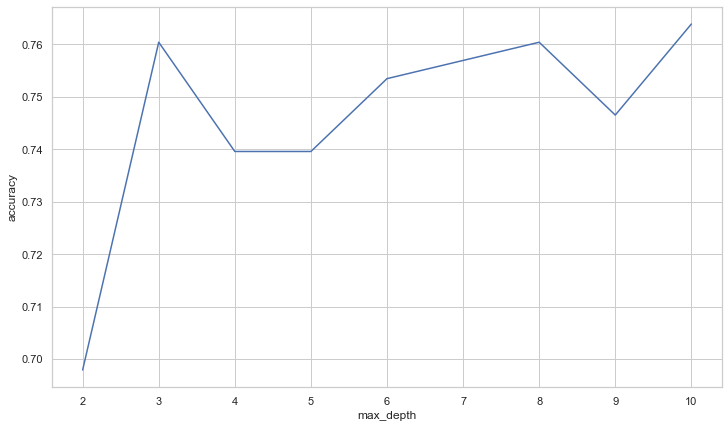

In [610]:
accuracies = []
for max_depth in max_depths:
    tree3 = DecisionTree(max_depth=max_depth, feature_types=['categorical']*10)
    tree3.fit(X_train.to_numpy(), y_train.to_numpy())
    pred = tree3.predict(X_test.to_numpy())
    accuracies.append(accuracy_score(y_test, pred))

plt.figure(figsize=(12, 7))
sns.lineplot(max_depths, accuracies)
plt.xlabel('max_depth')
plt.ylabel('accuracy');

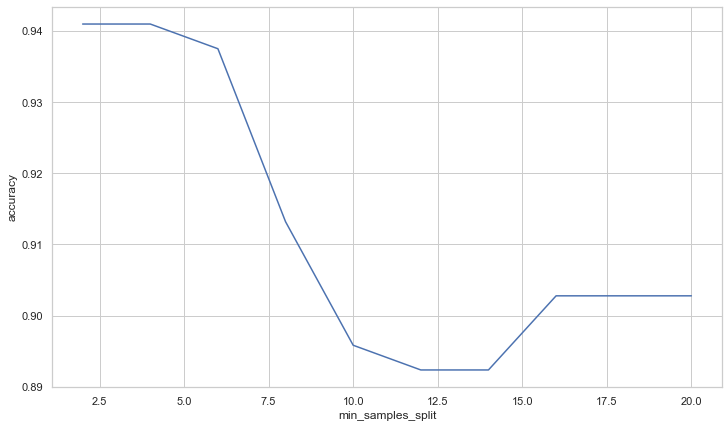

In [611]:
accuracies = []
for min_samples_split in min_samples_splits:
    tree3 = DecisionTree(min_samples_split=min_samples_split, feature_types=['categorical']*10)
    tree3.fit(X_train.to_numpy(), y_train.to_numpy())
    pred = tree3.predict(X_test.to_numpy())
    accuracies.append(accuracy_score(y_test, pred))

plt.figure(figsize=(12, 7))
sns.lineplot(min_samples_splits, accuracies)
plt.xlabel('min_samples_split')
plt.ylabel('accuracy');

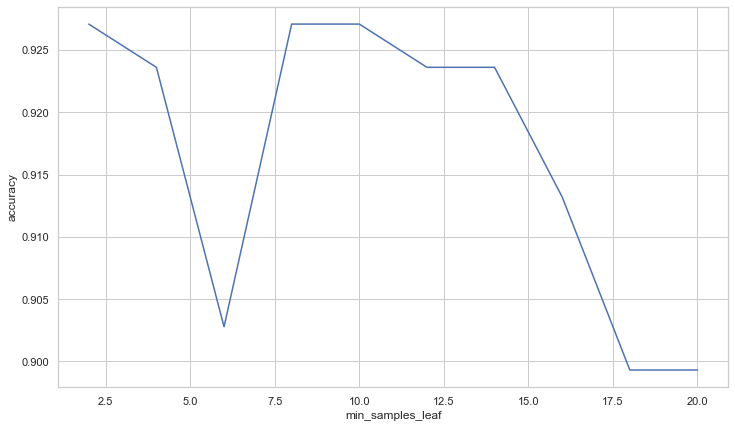

In [612]:
accuracies = []
for min_samples_leaf in min_samples_leafs:
    tree3 = DecisionTree(min_samples_leaf=min_samples_leaf, feature_types=['categorical']*10)
    tree3.fit(X_train.to_numpy(), y_train.to_numpy())
    pred = tree3.predict(X_test.to_numpy())
    accuracies.append(accuracy_score(y_test, pred))

plt.figure(figsize=(12, 7))
sns.lineplot(min_samples_leafs, accuracies)
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy');

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [613]:
class DecisionTree:
    def __init__(self, feature_types, max_depth=None, min_samples_split=None, min_samples_leaf=None):
        if np.any(list(map(lambda x: x != "real" and x != "categorical", feature_types))):
            raise ValueError("There is unknown feature type")

        self._tree = {}
        self._feature_types = feature_types
        self._max_depth = max_depth
        self._min_samples_split = min_samples_split
        self._min_samples_leaf = min_samples_leaf
        self._depth = 0
    
    def get_params(self, *args, **kwargs): # добавим это, чтобы cross_val_score работал
        return {'feature_types':self._feature_types}

    def _fit_node(self, sub_X, sub_y, node):
        
        if np.all(sub_y == sub_y[0]):
            node["type"] = "terminal"
            node["class"] = sub_y[0]
            return
        if self._max_depth != None:
            if self._depth == self._max_depth: # критерий останова на max_depth
                node["type"] = "terminal"
                node["class"] = Counter(sub_y).most_common(1)[0][0]
                return
        if self._min_samples_split != None:
            if len(sub_y) < self._min_samples_split: # критерий останова на min_samples_split
                node["type"] = "terminal"
                node["class"] = Counter(sub_y).most_common(1)[0][0]
                return

        feature_best, threshold_best, gini_best, split = None, None, None, None
        for feature in range(sub_X.shape[1]):
            if len(np.unique(sub_X[:, feature])) == 1:
                node["type"] = "terminal"
                node["class"] = sub_y[0]
                continue

            feature_type = self._feature_types[feature]
            categories_map = {}

            if feature_type == "real":
                feature_vector = sub_X[:, feature]
            elif feature_type == "categorical":
                counts = Counter(sub_X[:, feature])
                clicks = Counter(sub_X[sub_y == 1, feature])
                ratio = {}
                for key, current_count in counts.items():
                    if key in clicks:
                        current_click = clicks[key]
                    else:
                        current_click = 0

                    ratio[key] = current_click / current_count

                ratio_sorted = dict(sorted(ratio.items(), key=lambda x:x[1]))
                categories_map = dict(zip(ratio_sorted.keys(), np.arange(len(ratio_sorted))))

                feature_vector = np.array(list(map(lambda x: categories_map[x], sub_X[:, feature])))

            else:
                raise ValueError



            _, _, threshold, gini = find_best_split(feature_vector, sub_y)
            if gini_best is None or gini > gini_best:
                feature_best = feature
                gini_best = gini

                if feature_type == "real":
                    threshold_best = threshold
                    split = feature_vector < threshold
                elif feature_type == "categorical":
                    threshold_best = list(map(lambda x: x[0],
                                              filter(lambda x: x[1] < threshold, categories_map.items())))

                    split = feature_vector < threshold
                else:
                    raise ValueError
                

        if feature_best is None:
            node["type"] = "terminal"
            node["class"] = Counter(sub_y).most_common(1)[0][0]
            return
        # критерий останова на min_samples_leaf
        if self._min_samples_leaf != None:
            if (len(sub_y[split]) < self._min_samples_leaf) or (len(sub_y[np.logical_not(split)]) < self._min_samples_leaf):
                node["type"] = "terminal"
                node["class"] = Counter(sub_y).most_common(1)[0][0]
                return

        node["type"] = "nonterminal"
        self._depth += 1

        node["feature_split"] = feature_best
        if self._feature_types[feature_best] == "real":
            node["threshold"] = threshold_best
        elif self._feature_types[feature_best] == "categorical":
            node["categories_split"] = threshold_best
        else:
            raise ValueError
            

        node["left_child"], node["right_child"] = {}, {}
        self._fit_node(sub_X[split], sub_y[split], node["left_child"])
        self._fit_node(sub_X[np.logical_not(split)], sub_y[np.logical_not(split)], node["right_child"])
        

    def _predict_node(self, x, node):
        # ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
        if node['type'] == 'nonterminal':
            if 'threshold' in node.keys():
                split = x[node['feature_split']] < node['threshold']
                if split == True:
                    return self._predict_node(x, node['left_child'])
                
                else:
                    return self._predict_node(x, node['right_child'])
            else:
                if x[node['feature_split']] in node['categories_split']:
                    return self._predict_node(x, node['left_child'])
                else:
                    return self._predict_node(x, node['right_child'])

        else:
            return node['class']

    def fit(self, X, y):
        self._fit_node(X, y, self._tree)

    def predict(self, X):
        predicted = []
        for x in X:
            predicted.append(self._predict_node(x, self._tree))
        return np.array(predicted)

In [614]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

m_df = pd.read_csv('agaricus-lepiota.data')
le = LabelEncoder()
for column in m_df.columns:
    m_df[column] = le.fit_transform(m_df[column])
    
m_y = m_df['p'].to_numpy()
m_X = m_df.drop(columns='p').to_numpy()

enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
m_X_enc = enc.fit_transform(m_X)

In [615]:
ttt_df = pd.read_csv('tic-tac-toe.data')
le = LabelEncoder()
for column in ttt_df.columns:
    ttt_df[column] = le.fit_transform(ttt_df[column])
    
ttt_y = ttt_df['positive'].to_numpy()
ttt_X = ttt_df.drop(columns='positive').to_numpy()

enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ttt_X_enc = enc.fit_transform(ttt_X)

In [616]:
car_df = pd.read_csv('car.data')
car_df['unacc'] = car_df['unacc'].replace({'unacc':0, 'acc':0, 'good':1, 'vgood':1})

le = LabelEncoder()
for column in car_df.columns:
    car_df[column] = le.fit_transform(car_df[column])

car_y = car_df['unacc'].to_numpy()
car_X = car_df.drop(columns='unacc').to_numpy()

enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
car_X_enc = enc.fit_transform(car_X)

In [617]:
n_df = pd.read_csv('nursery.data')
n_df['recommend'] = n_df['recommend'].replace({'not_recom':0, 'recommend':0, 'very_recom':1,
                                              'priority':1, 'spec_prior':1})
le = LabelEncoder()
for column in n_df.columns:
    n_df[column] = le.fit_transform(n_df[column])
    
n_y = n_df['recommend'].to_numpy()
n_X = n_df.drop(columns='recommend').to_numpy()

enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
n_X_enc = enc.fit_transform(n_X)

In [618]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score

In [619]:
# Для датасета mushrooms:
from sklearn.model_selection import cross_val_score

tree1 = DecisionTree(['real']*m_X.shape[1])
tree2 = DecisionTree(['categorical']*m_X.shape[1])
tree3 = DecisionTree(['real']*m_X_enc.shape[1])
tree4 = DecisionTreeClassifier()

score1 = cross_val_score(tree1, m_X, m_y, cv=10, scoring=make_scorer(accuracy_score))
score2 = cross_val_score(tree2, m_X, m_y, cv=10, scoring=make_scorer(accuracy_score))
score3 = cross_val_score(tree3, m_X_enc, m_y, cv=10, scoring=make_scorer(accuracy_score))
score4 = cross_val_score(tree4, m_X, m_y, cv=10, scoring=make_scorer(accuracy_score))

print(f'mushrooms tree1 : {np.mean(score1)}')
print(f'mushrooms tree2 : {np.mean(score2)}')
print(f'mushrooms tree3 : {np.mean(score3)}')
print(f'mushrooms tree4 : {np.mean(score4)}')

mushrooms tree1 : 0.9992610837438424
mushrooms tree2 : 1.0
mushrooms tree3 : 0.9996305418719211
mushrooms tree4 : 0.9627233562976023


In [620]:
# Для датасета tic-tac-toe:
from sklearn.model_selection import cross_val_score

tree1 = DecisionTree(['real']*ttt_X.shape[1])
tree2 = DecisionTree(['categorical']*ttt_X.shape[1])
tree3 = DecisionTree(['real']*ttt_X_enc.shape[1])
tree4 = DecisionTreeClassifier()

score1 = cross_val_score(tree1, ttt_X, ttt_y, cv=10, scoring=make_scorer(accuracy_score))
score2 = cross_val_score(tree2, ttt_X, ttt_y, cv=10, scoring=make_scorer(accuracy_score))
score3 = cross_val_score(tree3, ttt_X_enc, ttt_y, cv=10, scoring=make_scorer(accuracy_score))
score4 = cross_val_score(tree4, ttt_X, ttt_y, cv=10, scoring=make_scorer(accuracy_score))

print(f'tic-tac-toe tree1 : {np.mean(score1)}')
print(f'tic-tac-toe tree2 : {np.mean(score2)}')
print(f'tic-tac-toe tree3 : {np.mean(score3)}')
print(f'tic-tac-toe tree4 : {np.mean(score4)}')

tic-tac-toe tree1 : 0.4626973684210527
tic-tac-toe tree2 : 0.549265350877193
tic-tac-toe tree3 : 0.5535197368421052
tic-tac-toe tree4 : 0.7871491228070175


In [621]:
# Для датасета car:
from sklearn.model_selection import cross_val_score

tree1 = DecisionTree(['real']*car_X.shape[1])
tree2 = DecisionTree(['categorical']*car_X.shape[1])
tree3 = DecisionTree(['real']*car_X_enc.shape[1])
tree4 = DecisionTreeClassifier()

score1 = cross_val_score(tree1, car_X, car_y, cv=10, scoring=make_scorer(accuracy_score))
score2 = cross_val_score(tree2, car_X, car_y, cv=10, scoring=make_scorer(accuracy_score))
score3 = cross_val_score(tree3, car_X_enc, car_y, cv=10, scoring=make_scorer(accuracy_score))
score4 = cross_val_score(tree4, car_X, car_y, cv=10, scoring=make_scorer(accuracy_score))

print(f'car tree1 : {np.mean(score1)}')
print(f'car tree2 : {np.mean(score2)}')
print(f'car tree3 : {np.mean(score3)}')
print(f'car tree4 : {np.mean(score4)}')

car tree1 : 0.9425998118026616
car tree2 : 0.9675191558005108
car tree3 : 0.9217670385804544
car tree4 : 0.9449522785320607


In [622]:
# Для датасета nursery:
from sklearn.model_selection import cross_val_score

tree1 = DecisionTree(['real']*n_X.shape[1])
tree2 = DecisionTree(['categorical']*n_X.shape[1])
tree3 = DecisionTree(['real']*n_X_enc.shape[1])
tree4 = DecisionTreeClassifier()

score1 = cross_val_score(tree1, n_X, n_y, cv=10, scoring=make_scorer(accuracy_score))
score2 = cross_val_score(tree2, n_X, n_y, cv=10, scoring=make_scorer(accuracy_score))
score3 = cross_val_score(tree3, n_X_enc, n_y, cv=10, scoring=make_scorer(accuracy_score))
score4 = cross_val_score(tree4, n_X, n_y, cv=10, scoring=make_scorer(accuracy_score))

print(f'nursery tree1 : {np.mean(score1)}')
print(f'nursery tree2 : {np.mean(score2)}')
print(f'nursery tree3 : {np.mean(score3)}')
print(f'nursery tree4 : {np.mean(score4)}')

nursery tree1 : 0.9998456790123458
nursery tree2 : 0.9999228395061728
nursery tree3 : 0.9997685185185186
nursery tree4 : 0.9998456790123458


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

Исходя из общих результатов, можно заключить, что наше дерево почти ничем не уступает дереву из sklearn. Причем оно показывает хоршее качество даже тогда, когда мы даем ей на вход не те переменные (вместо категориальных вещественные). Стоит отметить, однако, что для разных наборов данных деревья ведут себя по-разному. Например, для датасетов mushrooms и nursery деревья все 4 дерева показывают почти одинаковое качество, близкое к 1 или равное 1. В датасетах tic-tac-toe и car деревья ведут себя неодинаково. Для car качество находиться в пределах от 0.92 до 0.96, причем наивысшее качество показывает наше дерево для случая, когда все признаки принимаются, как категориальные. Для датасета tic-tac-toe совсем другая картина. Тут разброс очень сильный, от 0.46 до 0.76, причем в этот раз выигрывает дерево из sklearn. Более того, в 3 случаях, где используется самостоятельно реализованное дерево, качество на порядок ниже. Оно лежит в пределах от 0.46 до 0.55, и качество в 0.55 показывает модель с использованием OHE. Возможно, в датасета tic-tac-toe есть повторяющиеся наблюдения, которые не дают идеально разбить выборку. Случайности в результатах не присутствует. 

**Ответ:**

Вставьте что угодно, описывающее ваши впечатления от этого задания:

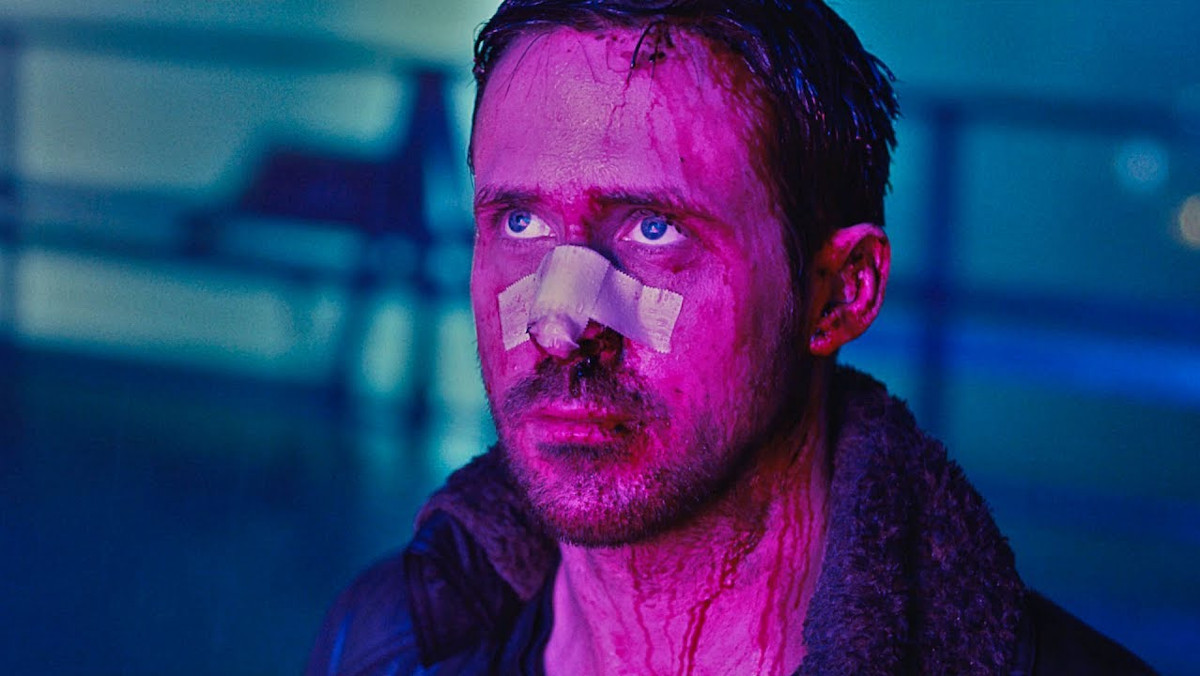